In [12]:
import pandas as pd
import numpy as np 
import random
import matplotlib.pyplot as plt

In [24]:
data = pd.read_csv("../MINDsmall_train/news.tsv", sep='\t', names=["newsId", "category", "subcategory", "title","abstract", "url", "title_entities","abstract_entities"])
data.head()

,newsId,category,subcategory,title,abstract,url,title_entities,abstract_entities
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik..."
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://assets.msn.com/labs/mind/AACk2N6.html,[],"[{""Label"": ""National Basketball Association"", ..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://assets.msn.com/labs/mind/AAAKEkt.html,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI..."


In [25]:
data.count()

newsId               51282
category             51282
subcategory          51282
title                51282
abstract             48616
url                  51282
title_entities       51279
abstract_entities    51278
dtype: int64

In [19]:
behaviors = pd.read_csv("../MINDsmall_train/behaviors.tsv", sep='\t', names=["ImpressionID", "Userid", "Time","History", "Impressions"])
behaviors.head()

,ImpressionID,Userid,Time,History,Impressions
0,1,U13740,11/11/2019 9:05:58 AM,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689-1 N35729-0
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...
2,3,U73700,11/14/2019 7:01:48 AM,N10732 N25792 N7563 N21087 N41087 N5445 N60384...,N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...
3,4,U34670,11/11/2019 5:28:05 AM,N45729 N2203 N871 N53880 N41375 N43142 N33013 ...,N35729-0 N33632-0 N49685-1 N27581-0
4,5,U8125,11/12/2019 4:11:21 PM,N10078 N56514 N14904 N33740,N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...


In [11]:
behaviors.count()

-----


ImpressionID      156965
Userid            156965
Time              156965
History           153727
Impressions       156965
Title_entities         0
dtype: int64

### Category
Categories of the news articfles.

In [18]:
categories = data['category'].unique()
print(categories)
print(f"Number of categories: {len(categories)}")

['lifestyle' 'health' 'news' 'sports' 'weather' 'entertainment' 'autos'
 'travel' 'foodanddrink' 'tv' 'finance' 'movies' 'video' 'music' 'kids'
 'middleeast' 'northamerica']
Number of categories: 17


### Total number of clicks

In [ ]:
# Extract click information from the "Impressions" column
behaviors['Click'] = behaviors['Impressions'].apply(lambda x: int(x.split('-')[-1]))

# Count the total number of clicks
total_clicks = behaviors['Click'].sum()

print(f'Total number of clicks: {total_clicks}')

Total number of clicks: 17033


### Number of clicks per article
Total number of clicks per article sorted by the most popular articles. 

Article ID	Category	Number of Clicks
N17933:	sports	62
N54655:	foodanddrink	44
N33513:	music	41
N12098:	finance	40
N47719:	news	40
N37977:	sports	37
N5123:	video	37
N20263:	news	36
N24827:	sports	36
N13537:	travel	35
N54950:	finance	35
N46911:	news	34
N62931:	health	34
N7815:	weather	34
N21241:	movies	33
N4690:	sports	33
N19594:	entertainment	33
N55829:	news	33
N39556:	news	32
N51591:	news	32
N56253:	sports	32
N7432:	video	32
N59873:	finance	32
N28936:	autos	32
...


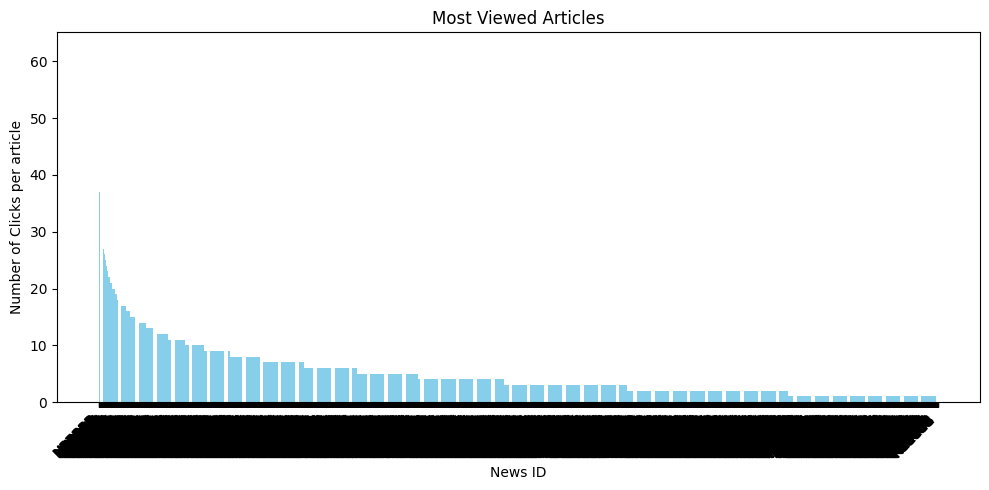

In [ ]:
# Group by news articles and count the clicks
clicks_per_article = behaviors.groupby('History').size()

# Sort the articles by the number of clicks in descending order
sorted_clicks_per_article = clicks_per_article.sort_values(ascending=False)

# Print the article ID, category and number of clicks for each article
print("Article ID\tCategory\tNumber of Clicks")
news_list = []
click_list = []
category_list = []

for news_id, clicks in sorted_clicks_per_article.items():
    news_split = news_id.split()
    first_element = news_split[0]

    category = data.loc[data['newsId'] == first_element, 'category'].values[0]

    news_list.append(first_element)
    category_list.append(category)
    click_list.append(clicks)
    if clicks > 31: 
        print(f'{first_element}:\t{category}\t{clicks}')
print("...")

plt.figure(figsize=(10, 5))
plt.bar(news_list[:len(click_list)], click_list, color='skyblue')
plt.xlabel('News ID')
plt.ylabel('Number of Clicks per article')
plt.title('Most Viewed Articles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


### Click-Through Rate (CTR)

In [ ]:
total_impressions = behaviors['Impressions'].sum()

ctr = (total_clicks / total_impressions) * 100
print(f'Click-Through Rate (CTR): {ctr:.2f}%')

KeyboardInterrupt: 

### Most popular article per day

In [ ]:
behaviors['Time'] = pd.to_datetime(behaviors['Time'])

# Convert Time column to datetime format
behaviors['Date'] = behaviors['Time'].dt.date

# Merge dataframes on the common column
merged_df = pd.merge(behaviors, data, left_on="History", right_on="newsId")

# Group by date and find the most popular article for each day
most_popular_per_day = merged_df.groupby("Date")["newsId"].apply(lambda x: x.value_counts().idxmax())


# Print the most popular article and its clicks for each day
for date, news_id in most_popular_per_day.items():
    clicks = merged_df[(merged_df["Date"] == date) & (merged_df["newsId"] == news_id)]["Click"].values[0]
    print(f"On {date}, the most popular article was {news_id} with {clicks} clicks.")

# Display the result
print(most_popular_per_day)





On 2019-11-09, the most popular article was N36424 with 1 clicks.
On 2019-11-10, the most popular article was N35671 with 0 clicks.
On 2019-11-11, the most popular article was N23113 with 0 clicks.
On 2019-11-12, the most popular article was N55189 with 0 clicks.
On 2019-11-13, the most popular article was N55189 with 0 clicks.
On 2019-11-14, the most popular article was N4607 with 1 clicks.
Date
2019-11-09    N36424
2019-11-10    N35671
2019-11-11    N23113
2019-11-12    N55189
2019-11-13    N55189
2019-11-14     N4607
Name: newsId, dtype: object
